In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [6]:
m,n=df.shape

In [4]:

stats_ = df.T.describe(percentiles = [0.975])
stats_.loc['yerr'] =stats_.apply(lambda x: 1.96 * x.loc['std'] / (x.loc['count'] ** (1/2)))
stats_ = stats_.T


In [7]:
arr_ = np.zeros((m,2))
for i in range(m):
    
    arr_[i][0] = stats_['mean'].iloc[i] - stats_['yerr'].iloc[i]    
    arr_[i][1] = stats_['mean'].iloc[i] + stats_['yerr'].iloc[i]   

In [8]:
y=43000

probability_ = []
for i in range(len(arr_)):
    
    if arr_[i].max() < y:
        result = 0
        probability_.append(result)
    elif arr_[i].min() > y:
        result = 1
        probability_.append(result)
    else:
        result = (arr_[i].max() - y) / (arr_[i].max() - arr_[i].min())
        probability_.append(result)
        
probability_

[0, 0.3217340557664793, 0.11497910610162898, 1]

<IPython.core.display.Javascript object>


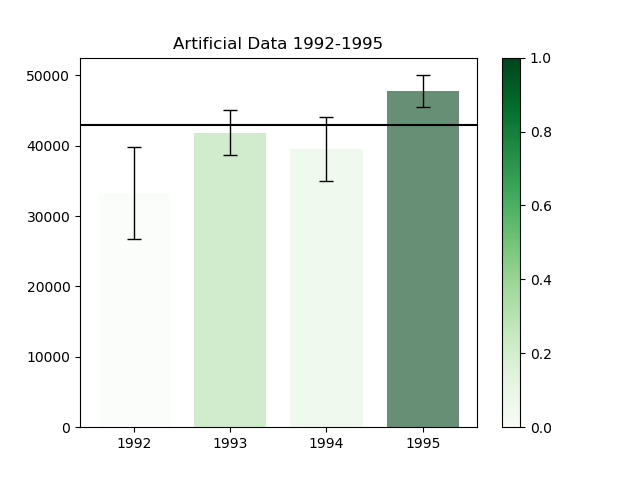

In [21]:
index = range(len(stats_.index))


cmap = cm.get_cmap('Greens')
# cpick = cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=-1.96, vmax=1.96))
cpick = cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=1))

cpick.set_array([])


plt.bar(index, stats_['mean'], yerr = stats_['yerr'], width=0.75,alpha=0.6, color = cpick.to_rgba(probability_), 
        error_kw={'capsize': 5, 'elinewidth': 1, 'alpha':1} )


cbar = plt.colorbar(cpick, orientation="vertical")


plt.axhline(y=y, color='k')
plt.xticks(index, stats_.index)
plt.title('Artificial Data 1992-1995')


plt.show()
